In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from scipy.stats import ranksums

from sklearn.model_selection import StratifiedKFold, train_test_split, KFold
from sklearn.metrics import mean_absolute_error, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

import random
from collections import Counter

import pickle

import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:

DATA_PATH = 'C:/Users/h/Desktop/AI_spark_2023_main/dataset/'
train = pd.read_csv(DATA_PATH + 'train_data.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   float64
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB


In [4]:
from sklearn.preprocessing import StandardScaler

train_trans = pd.DataFrame()

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler를 사용하여 train 데이터프레임의 각 열을 전처리
train_trans[['air_inflow',
        'air_end_temp',
        'out_pressure',
        'motor_current',
        'motor_rpm',
        'motor_temp',
        'motor_vibe'
        ]] = scaler.fit_transform(train[['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']])
train_trans['type'] = train['type']
# 결과 확인
print(train_trans.head())

   air_inflow  air_end_temp  out_pressure  motor_current  motor_rpm  \
0   -0.448257     -0.917212 -1.110223e-16      -0.511748  -1.007046   
1    0.699749      1.178320 -1.110223e-16       0.802045   1.118785   
2   -0.182053     -0.425427 -1.110223e-16      -0.202966  -0.508305   
3    0.200616      0.266970 -1.110223e-16       0.230799   0.194005   
4   -0.190372     -0.434598 -1.110223e-16      -0.208848  -0.517029   

   motor_temp  motor_vibe  type  
0   -0.910351   -0.331821     0  
1    1.172883    0.188462     0  
2   -0.421612   -0.211268     0  
3    0.265958   -0.039955     0  
4   -0.430592   -0.211268     0  


In [5]:
# 타입별로 데이터프레임만들기
train_type_0, train_type_1, train_type_2, train_type_3, train_type_4, train_type_5, train_type_6, train_type_7 = [train_trans.groupby('type').get_group(i) for i in range(8)]

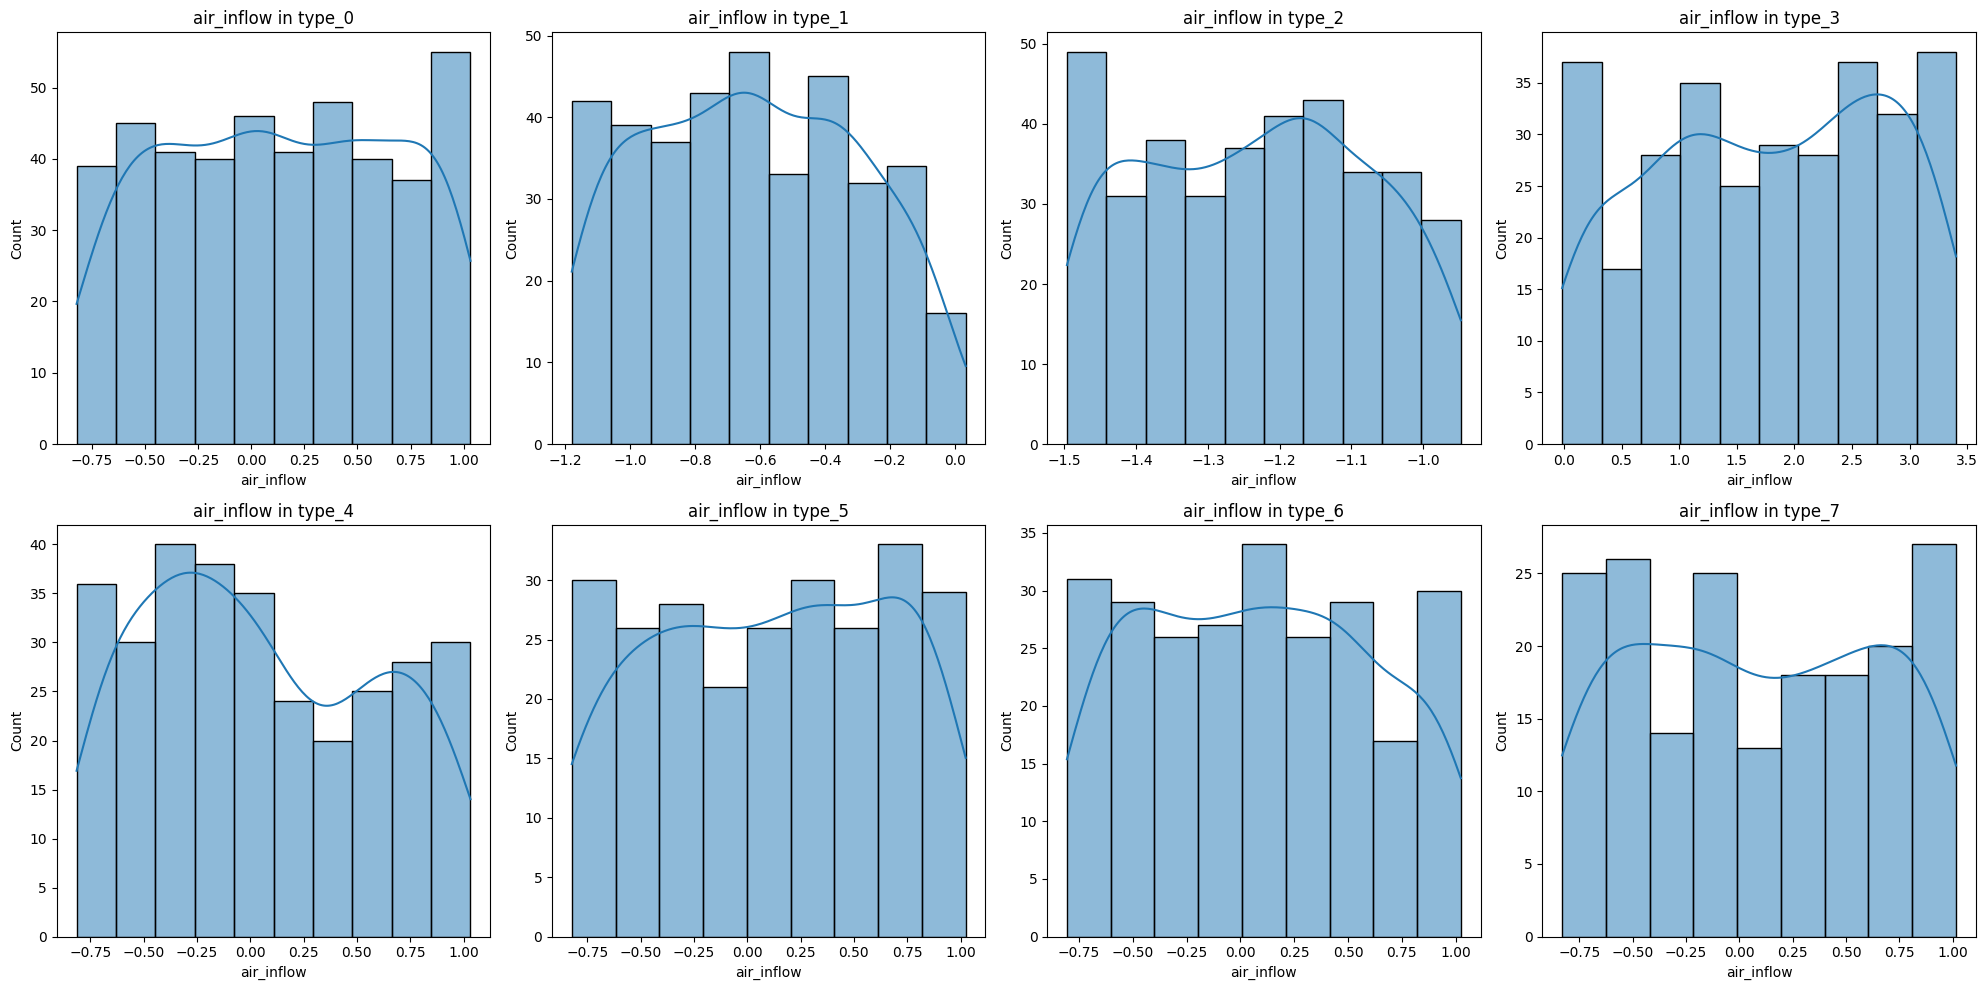

In [6]:
# 타입별로 히스토그램 시각화
# Air_inflow

fig, ax = plt.subplots(2, 4, figsize=(20,10))

palette = sns.color_palette("Set1", n_colors=8, desat=.5)

for i, axi in enumerate(ax.flat):
    sns.histplot(x='air_inflow',
                 data=train_trans[train_trans['type'] == i],
                 ax=axi,
                 #color=palette[i],
                 kde=True).set_title(f"air_inflow in type_{i}")
    
plt.tight_layout()
plt.show()

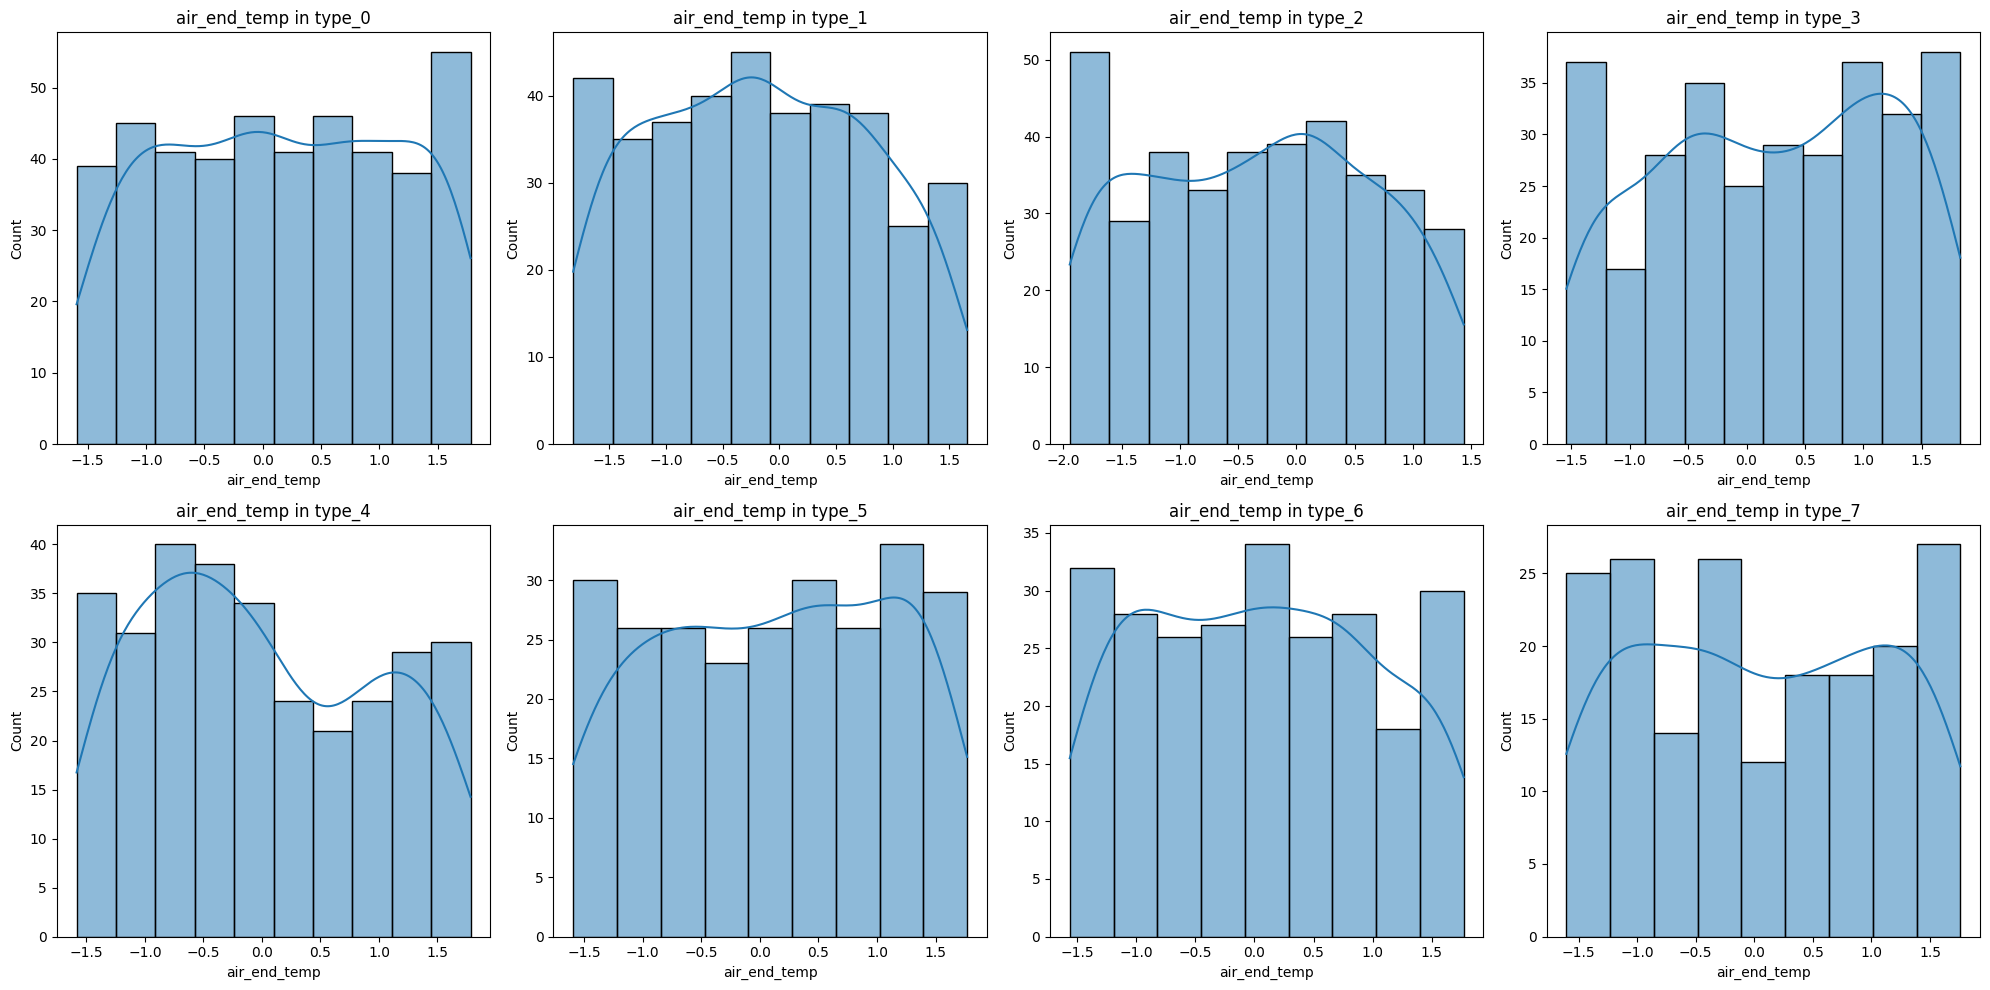

In [7]:
# 타입별로 히스토그램 시각화
# air_end_temp

fig, ax = plt.subplots(2, 4, figsize=(20,10))

for i, axi in enumerate(ax.flat):
    sns.histplot(x='air_end_temp',
                 data=train_trans[train_trans['type'] == i],
                 ax=axi,
                 kde=True).set_title(f"air_end_temp in type_{i}")
    
plt.tight_layout()
plt.show()

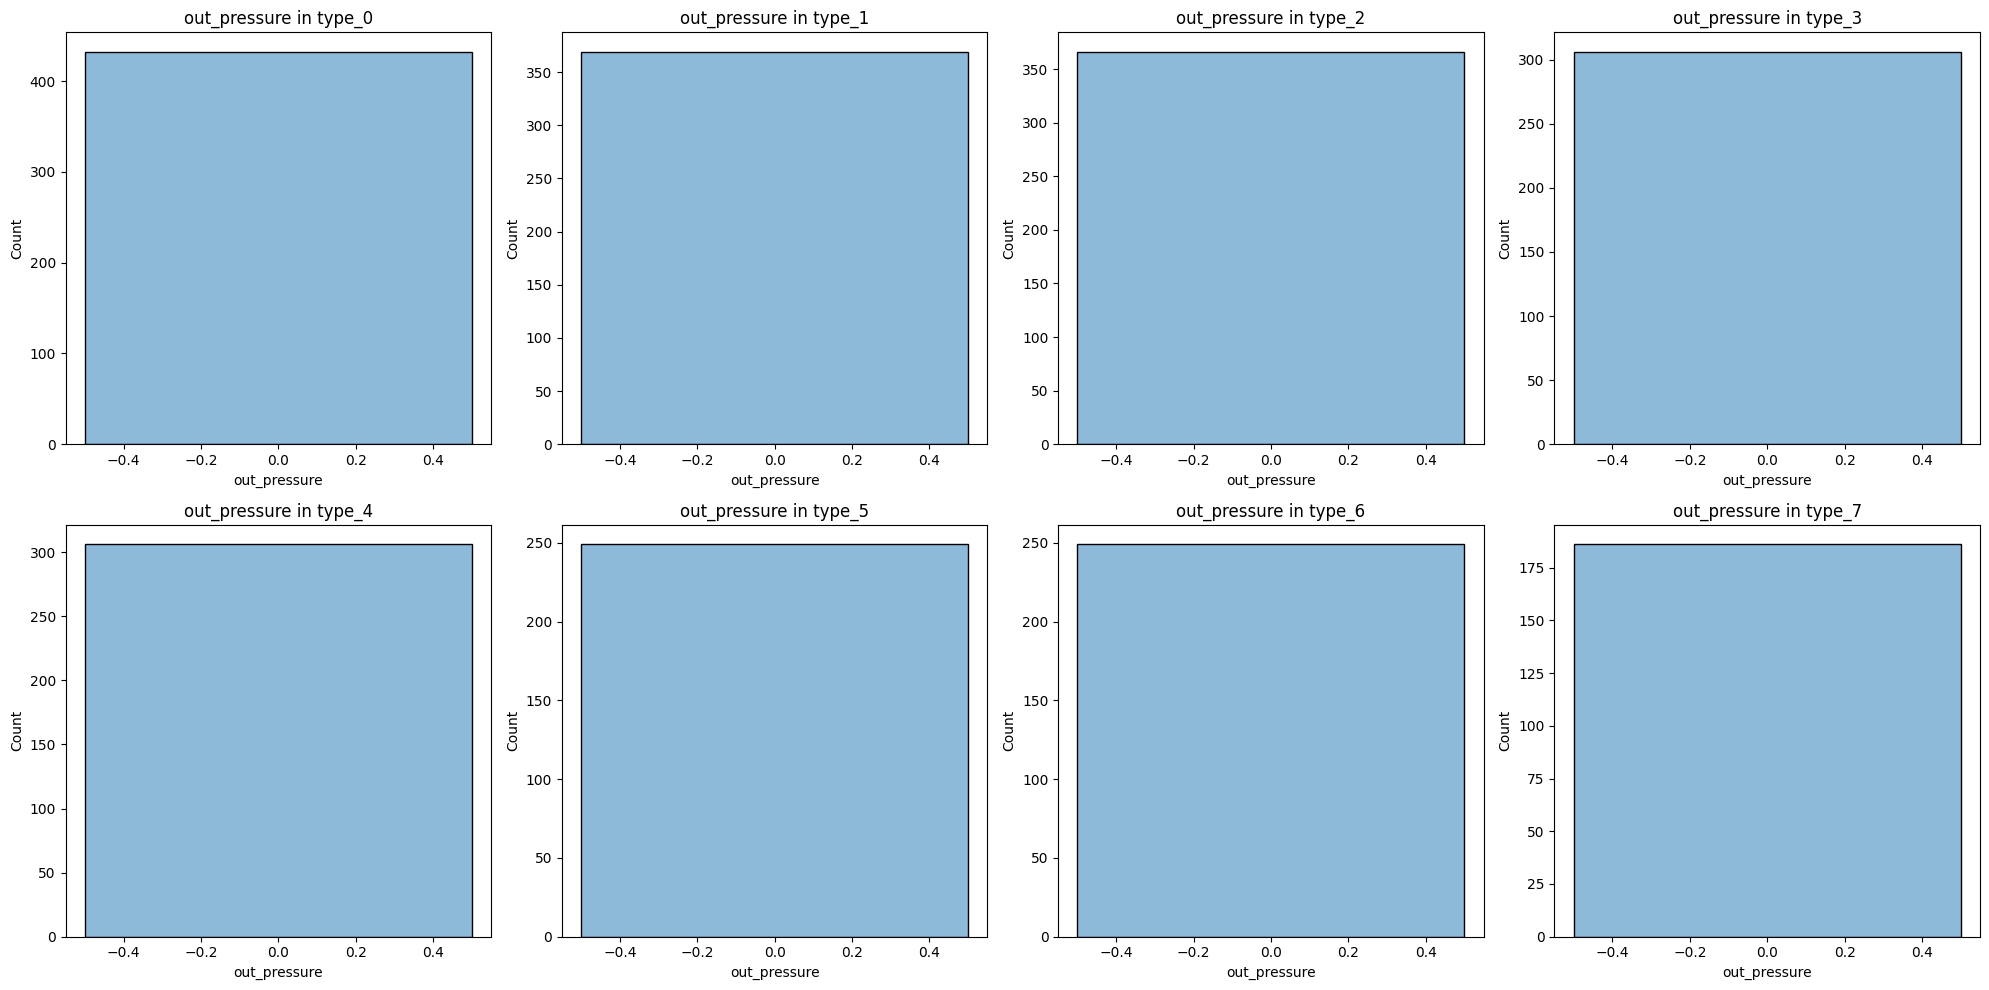

In [8]:
# 타입별로 히스토그램 시각화
# out_pressure

fig, ax = plt.subplots(2, 4, figsize=(20,10))

for i, axi in enumerate(ax.flat):
    sns.histplot(x='out_pressure',
                 data=train_trans[train_trans['type'] == i],
                 ax=axi,
                 kde=True).set_title(f"out_pressure in type_{i}")
    
plt.tight_layout()
plt.show()

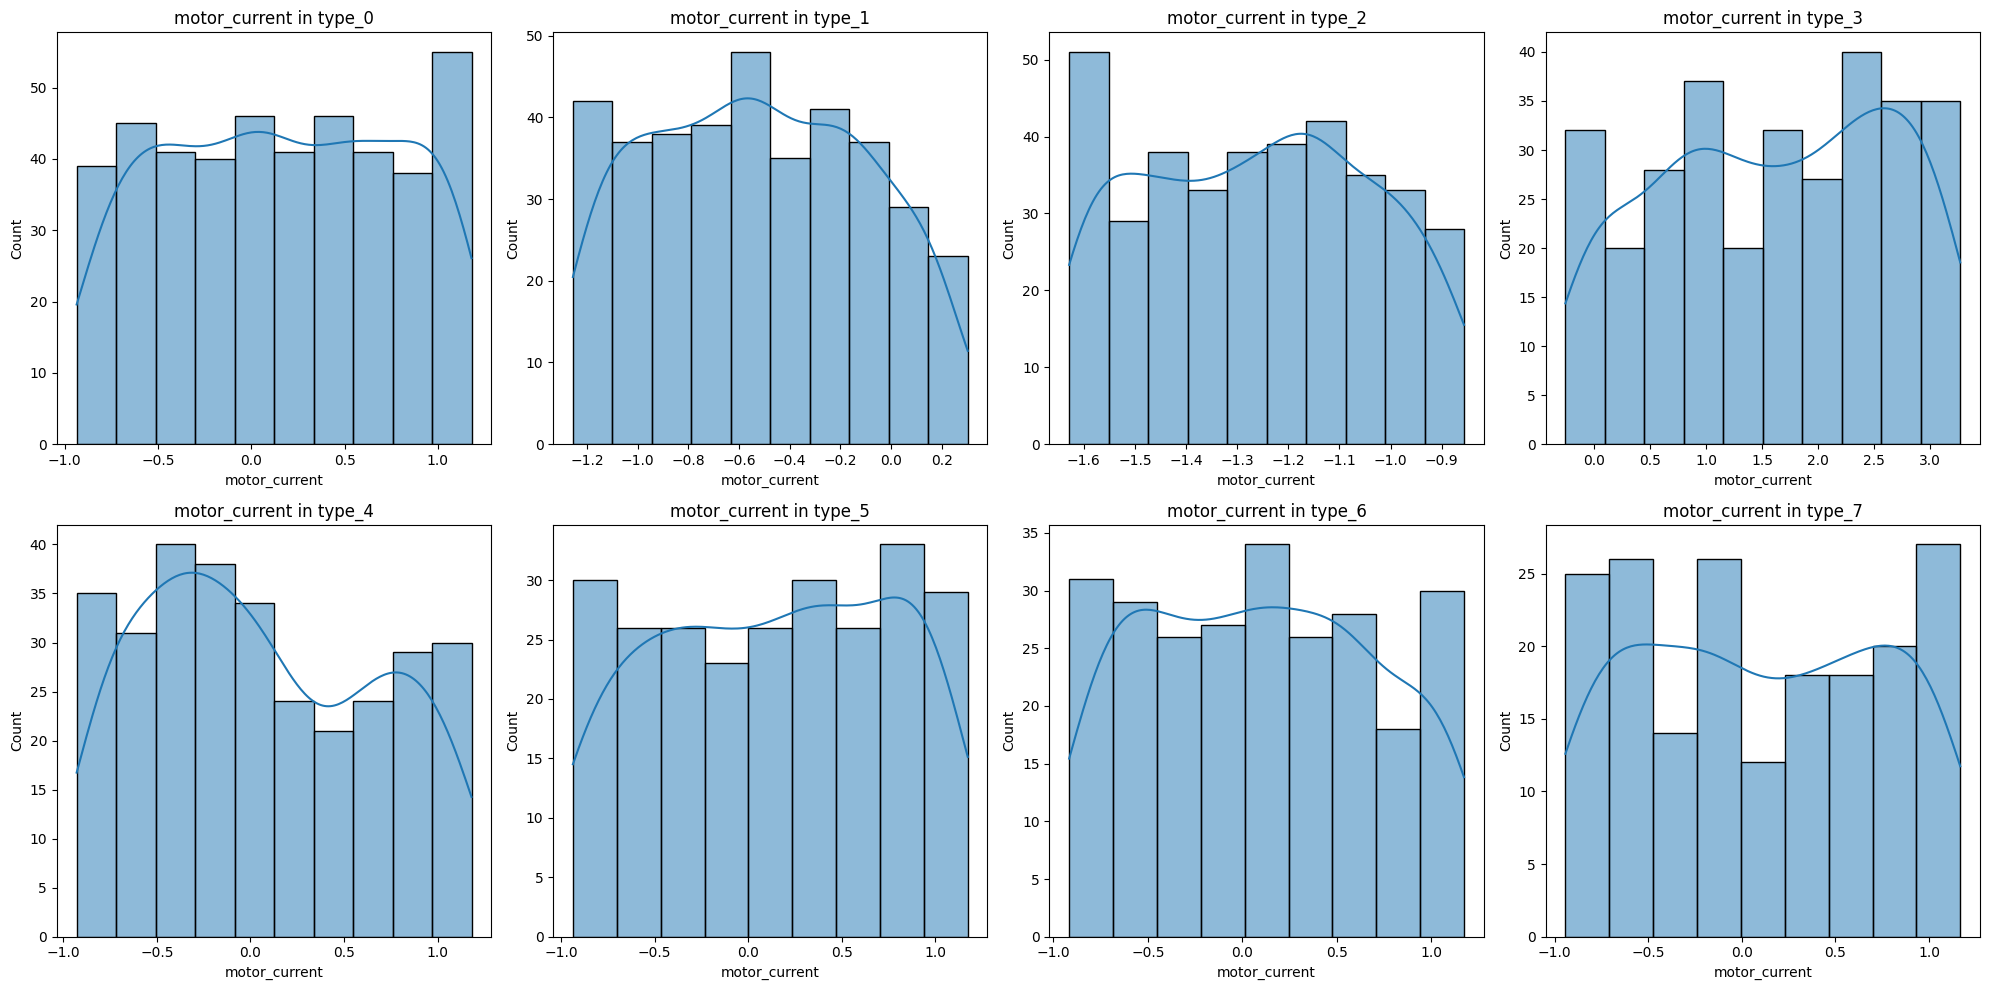

In [9]:
# 타입별로 히스토그램 시각화
# motor_current

fig, ax = plt.subplots(2, 4, figsize=(20,10))

for i, axi in enumerate(ax.flat):
    sns.histplot(x='motor_current',
                 data=train_trans[train_trans['type'] == i],
                 ax=axi,
                 kde=True).set_title(f"motor_current in type_{i}")
    
plt.tight_layout()
plt.show()

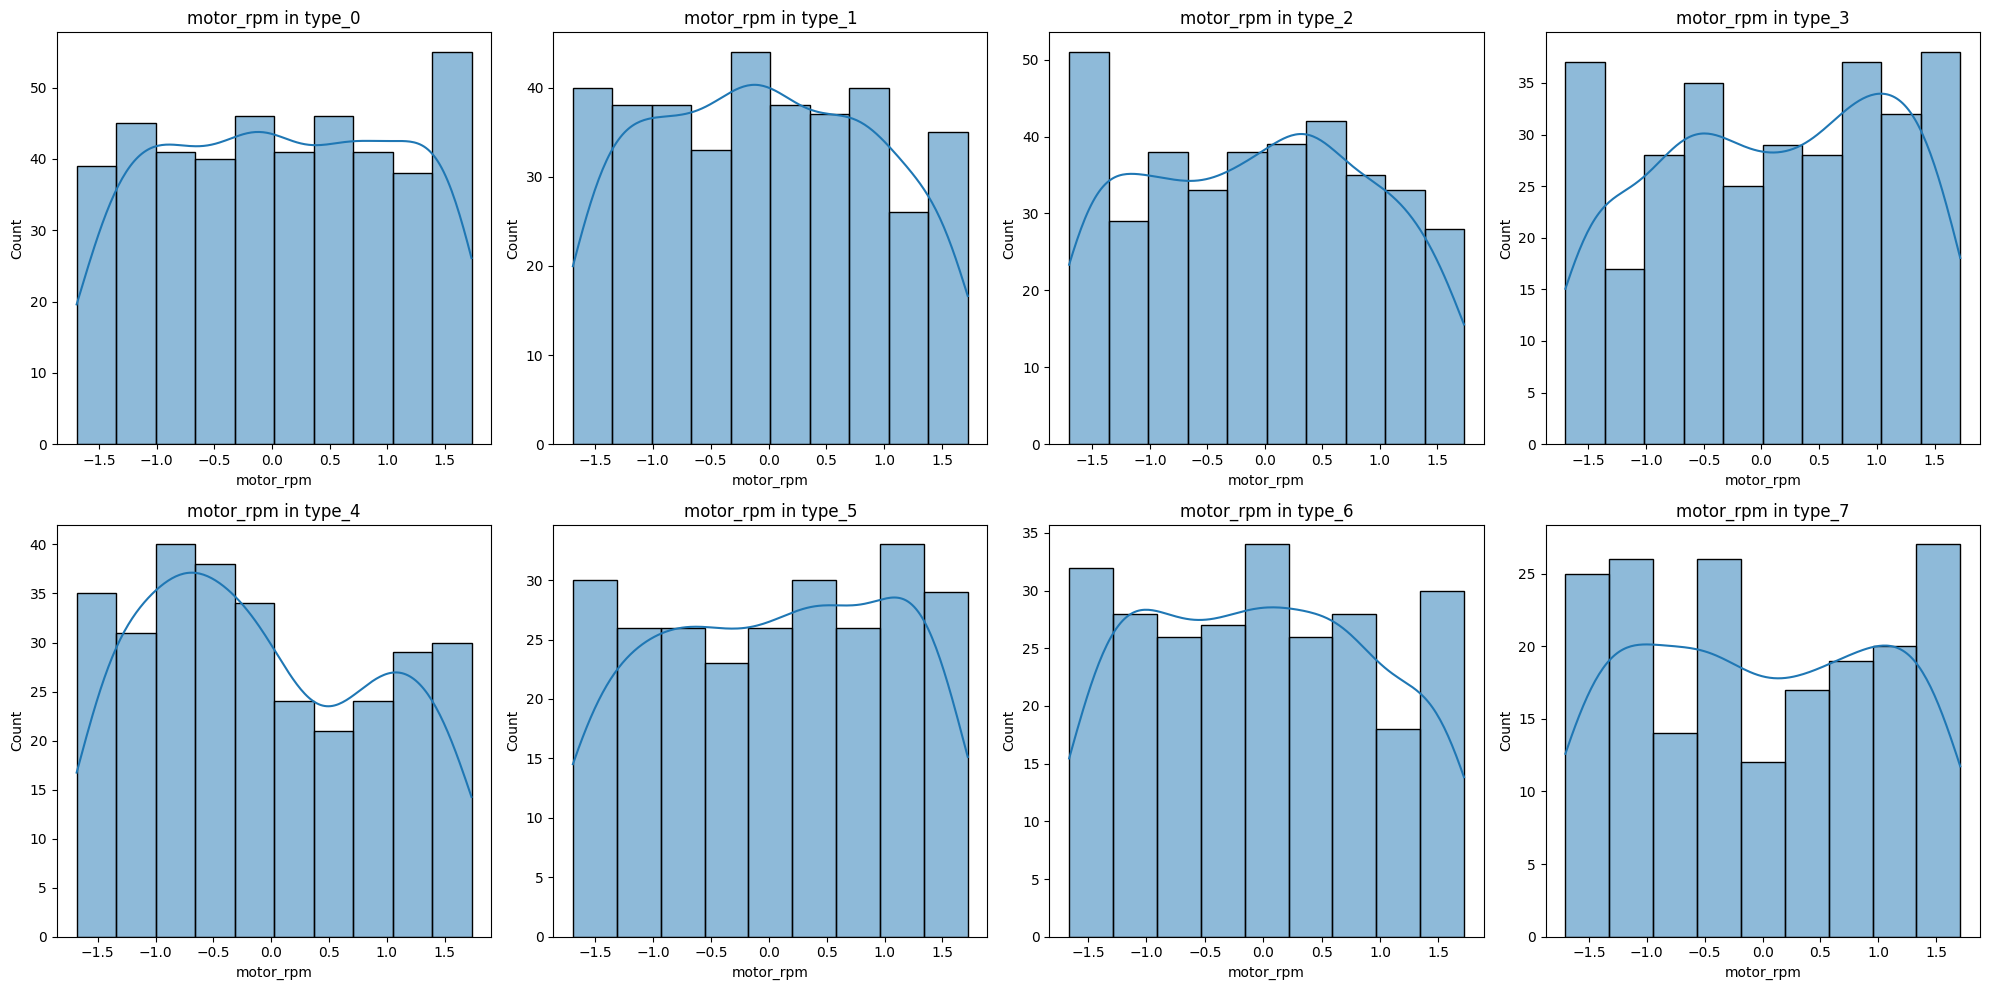

In [10]:
# 타입별로 히스토그램 시각화
# motor_rpm

fig, ax = plt.subplots(2, 4, figsize=(20,10))

for i, axi in enumerate(ax.flat):
    sns.histplot(x='motor_rpm',
                 data=train_trans[train_trans['type'] == i],
                 ax=axi,
                 kde=True).set_title(f"motor_rpm in type_{i}")
    
plt.tight_layout()
plt.show()

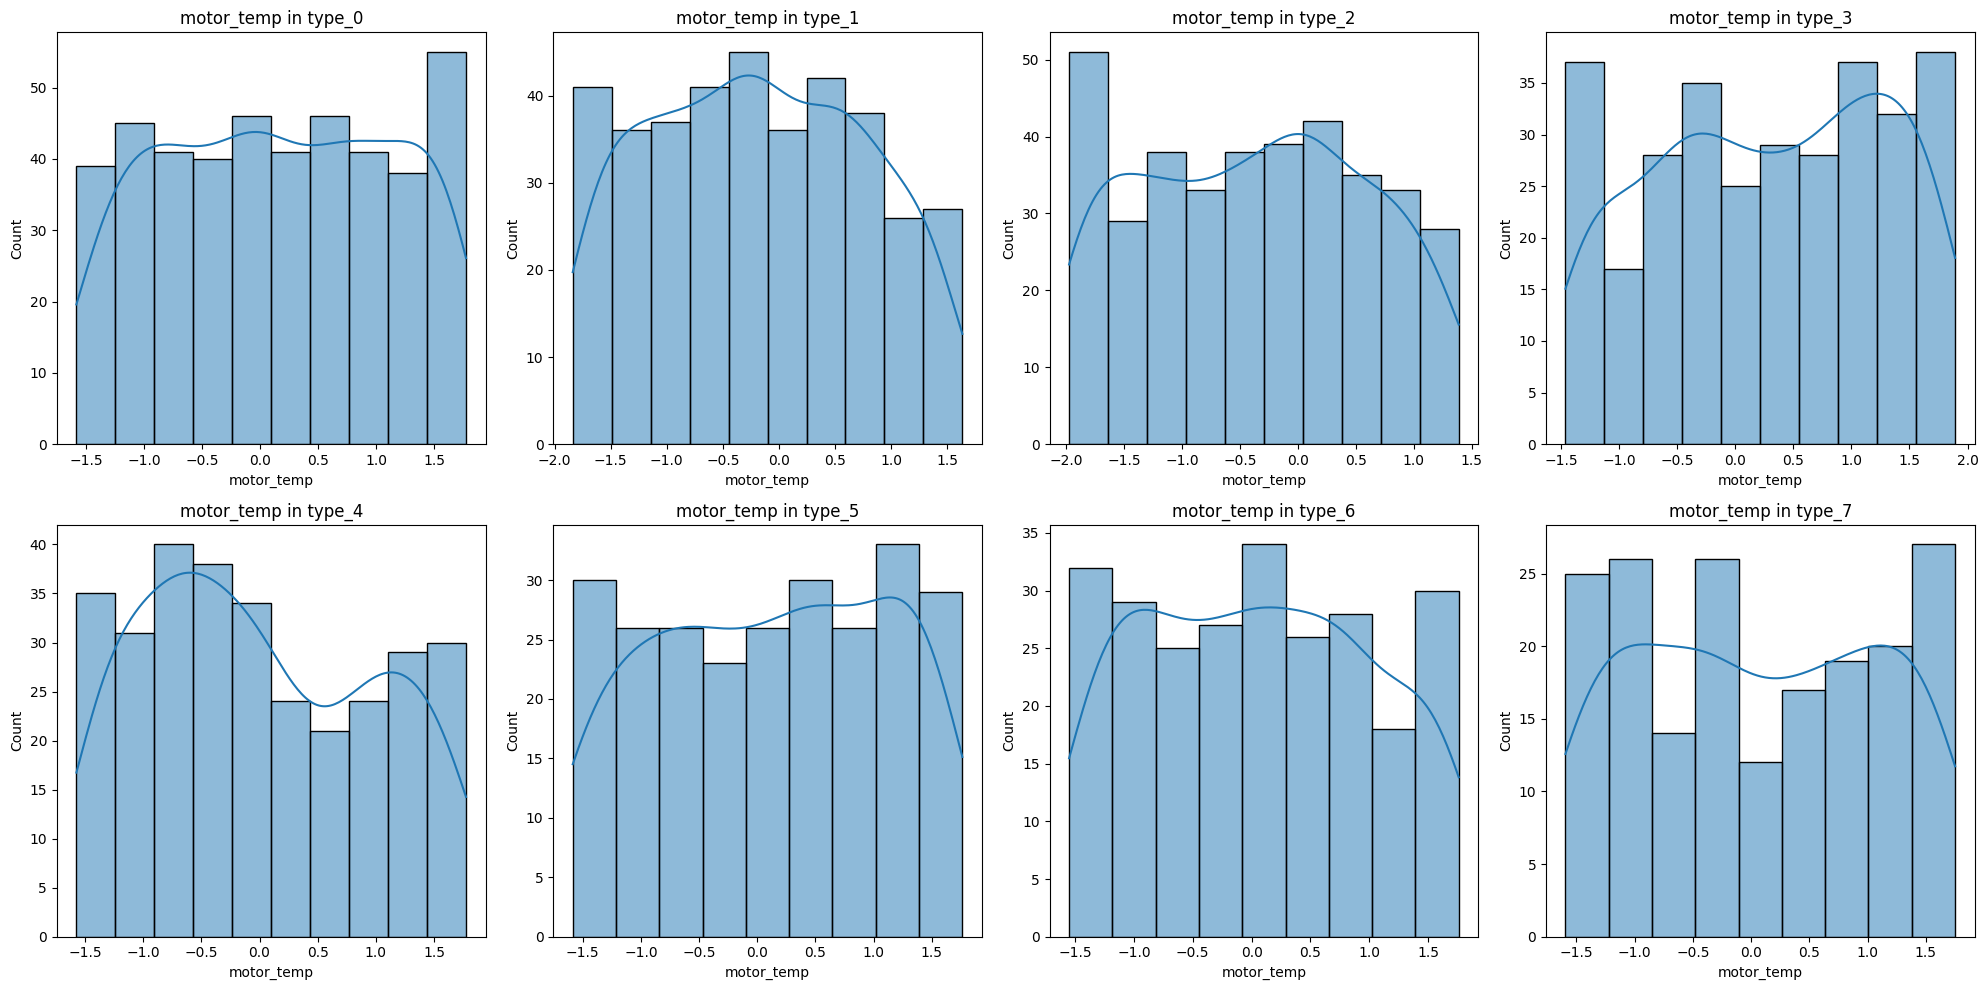

In [11]:
# 타입별로 히스토그램 시각화
# motor_temp

fig, ax = plt.subplots(2, 4, figsize=(20,10))

for i, axi in enumerate(ax.flat):
    sns.histplot(x='motor_temp',
                 data=train_trans[train_trans['type'] == i],
                 ax=axi,
                 kde=True).set_title(f"motor_temp in type_{i}")
    
plt.tight_layout()
plt.show()

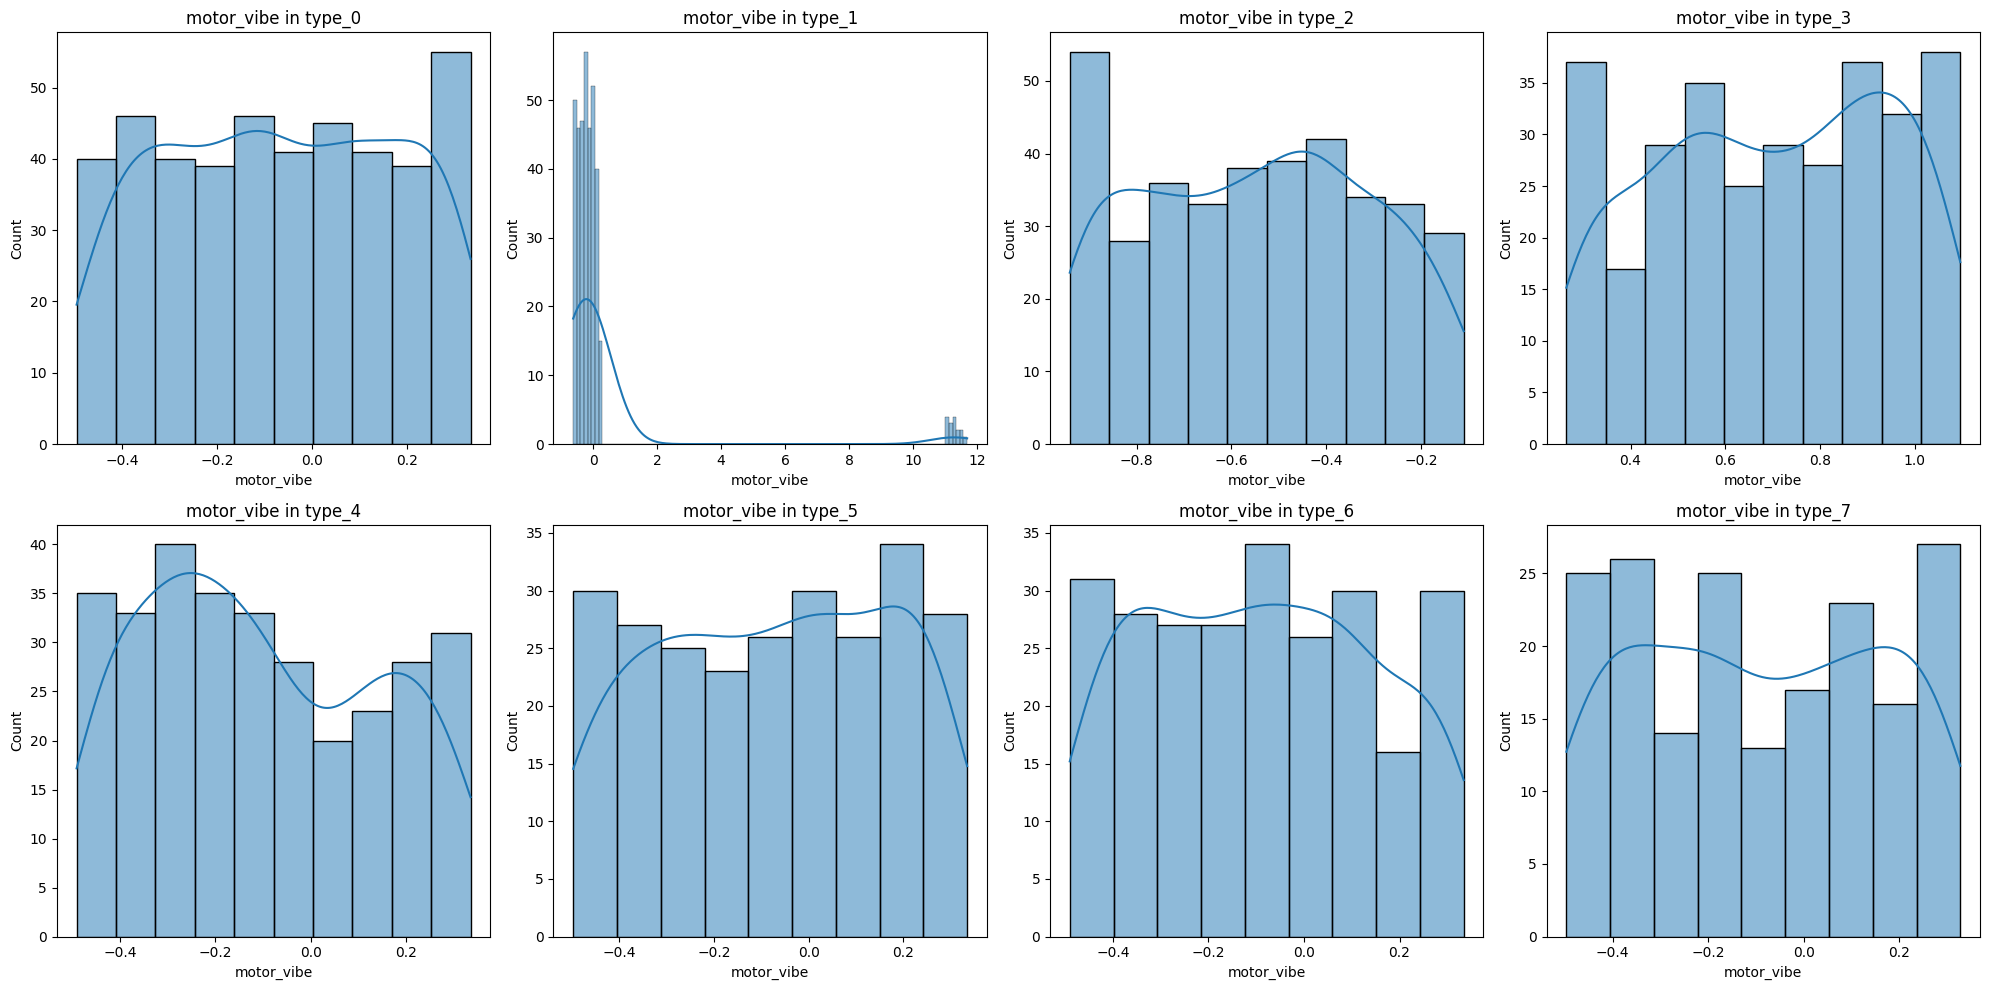

In [12]:
# 타입별로 히스토그램 시각화
# motor_vibe

fig, ax = plt.subplots(2, 4, figsize=(20,10))

for i, axi in enumerate(ax.flat):
    sns.histplot(x='motor_vibe',
                 data=train_trans[train_trans['type'] == i],
                 ax=axi,
                 kde=True).set_title(f"motor_vibe in type_{i}")
    
plt.tight_layout()
plt.show()

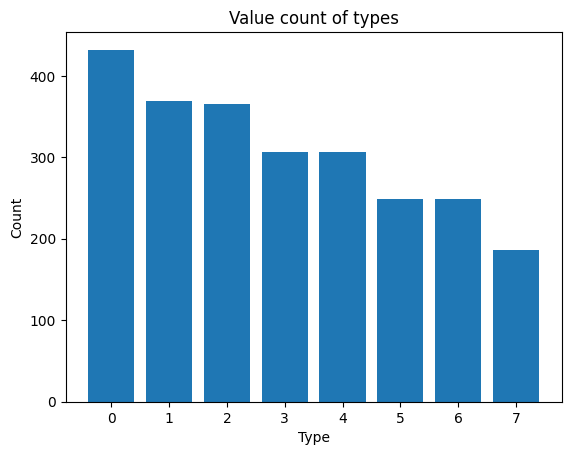

In [15]:
# 'type' 열의 value count 계산
type_count = train['type'].value_counts()

# 막대 그래프로 시각화
plt.bar(type_count.index, type_count.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Value count of types')
plt.show()